<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Gestion_y_Procesamiento_BD/TP_ANP_ORTEGA_YUBRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

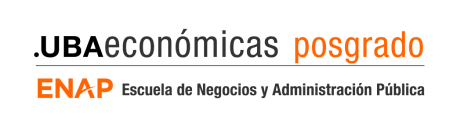

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Gestión y Procesamiento de Base de datos y Nociones de Auditoría no Presencial - **TPANP**


- Carolina CASTRO

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


### Conjunto de Datos

In [1]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Gestion_y_Procesamiento_BD/"

In [2]:
archivo = "bank-full.csv"

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

### Creación y visualizacion del DataFrame

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
bankfull = pd.read_csv(url+archivo)

In [5]:
bankfull.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


### Fase 2 Crisp-DM Conociendo los Datos

#### Tarea Descripción de los Datos

In [6]:
bankfull.shape

(45211, 17)

- **age**: edad del cliente, valor numérico entero mayor a 18.
- **job**: trabajo del cliente.
- **marital**: estado civil del cliente.
- **education**: educación alcanzada por el cliente.
- **default**: si el cliente posee deudas.
- **balance**: depósito del cliente en euros.
- **housing**: propietario de inmueble o alquila.
- **loan**: si el cliente tiene un préstamo.
- **contact**: último contacto del cliente.
- **day**: día del último contacto del cliente.
- **month**: mes del último contacto el cliente.
- **duration**: duración del último contacto del cliente.
- **campaign**: identificación de la campaña.
- **pdays**: dias posteriores a la campaña.
- **previous**: números de contactos previos a la campaña.
- **poutcome**: resultados de la campaña anterior.
- **y**: si suscribe un depósito a plazo posterior a campaña.

Se procede a agregar una columna en virtud de la inclusión en el registro de la Ley Nº 26.951 (Valores aleatorios)

In [7]:
registro = np.random.randint(0,2,45211)

In [8]:
L26951 = pd.Series(registro)

In [9]:
bankfull["L26951"] = L26951

In [10]:
bankfull.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,L26951
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0


#### Tarea Exploración de los Datos

##### Analisis de datos faltantes

In [11]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  L26951     45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


##### Eliminado datos duplicados

In [12]:
bankfull = bankfull.drop_duplicates()

In [13]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  L26951     45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


#### Tarea Verificación de la calidad de los Datos

In [14]:
pip install benford_py

In [15]:
import benford as bf


Initialized sequence with 41697 registries.

Test performed on 41697 registries.
Discarded 0 records < 1 after preparation.


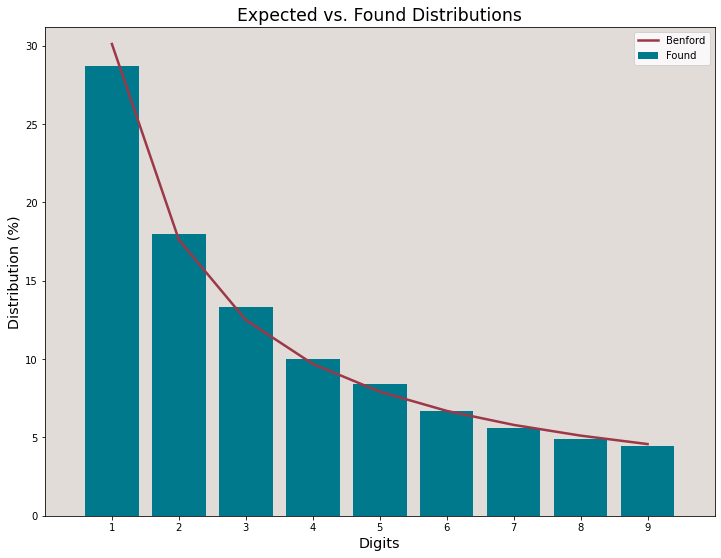

In [16]:
balance = bf.first_digits(bankfull.balance, digs=1, decimals=0)

In [17]:
balance

,Counts,Found,Expected
First_1_Dig,,,
1,11974,0.287167,0.301030
2,7507,0.180037,0.176091
3,5542,0.132911,0.124939
4,4169,0.099983,0.096910
5,3494,0.083795,0.079181
6,2797,0.067079,0.066947
7,2324,0.055735,0.057992
8,2043,0.048996,0.051153
9,1847,0.044296,0.045757



Initialized sequence with 45211 registries.

Test performed on 45211 registries.
Discarded 0 records < 1 after preparation.


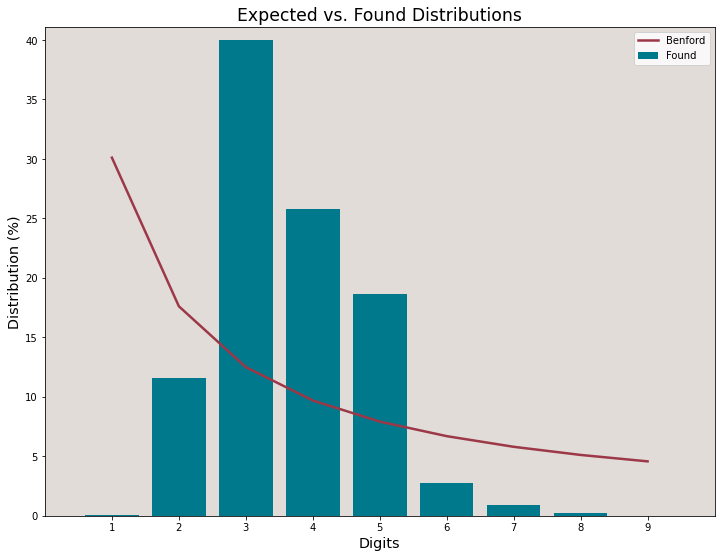

In [18]:
age = bf.first_digits(bankfull.age, digs=1, decimals=0)

In [19]:
age

,Counts,Found,Expected
First_1_Dig,,,
1,47,0.001040,0.301030
2,5226,0.115591,0.176091
3,18089,0.400102,0.124939
4,11655,0.257791,0.096910
5,8410,0.186017,0.079181
6,1230,0.027206,0.066947
7,424,0.009378,0.057992
8,121,0.002676,0.051153
9,9,0.000199,0.045757



 #################  Mantissas Test  #################

The Mantissas MEAN is      0.501293.	Ref: 0.5
The Mantissas VARIANCE is  0.081457.	Ref: 0.08333
The Mantissas SKEWNESS is  -0.033342.	Ref: 0.0
The Mantissas KURTOSIS is  -1.152614.	Ref: -1.2

The Kolmogorov-Smirnov statistic for the Mantissas distribution is 0.013988.
The critical value for the confidence level of 95% is 0.009405 -- FAIL



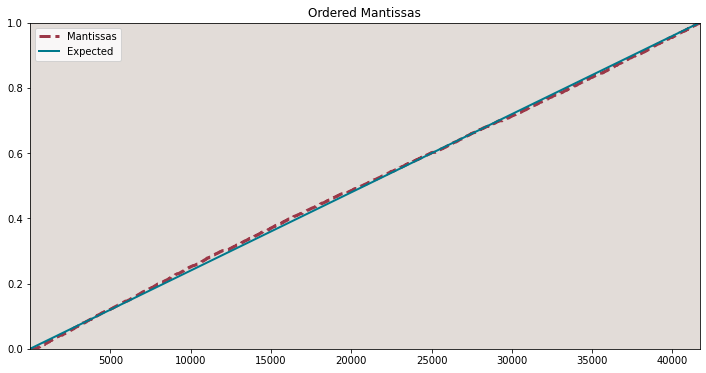

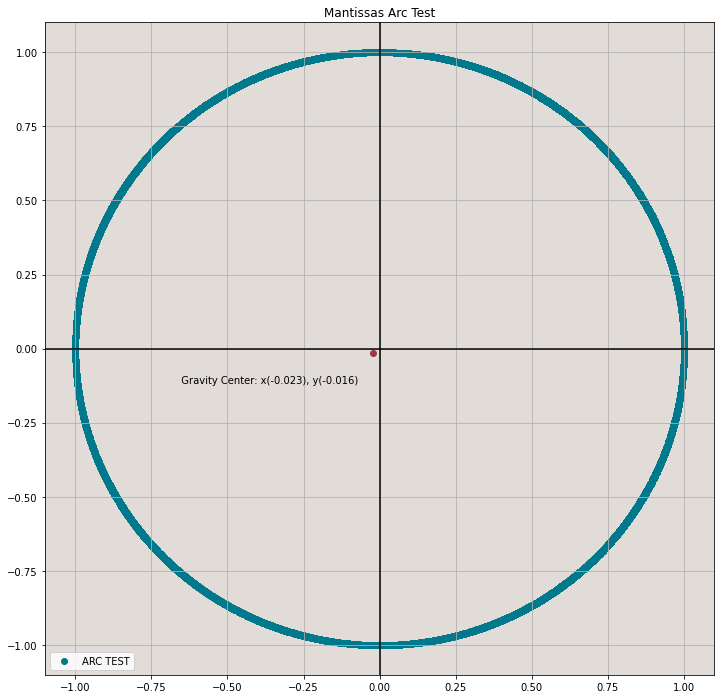

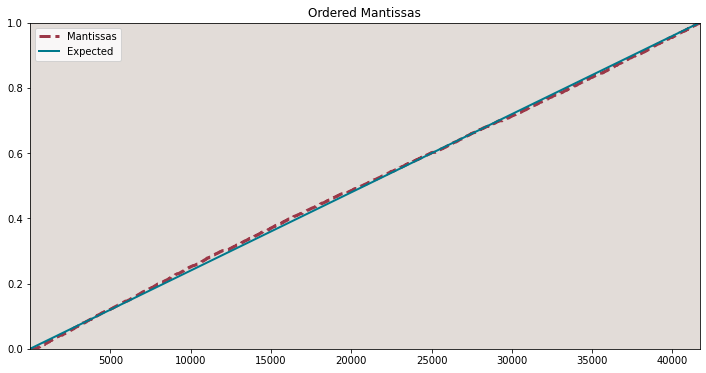

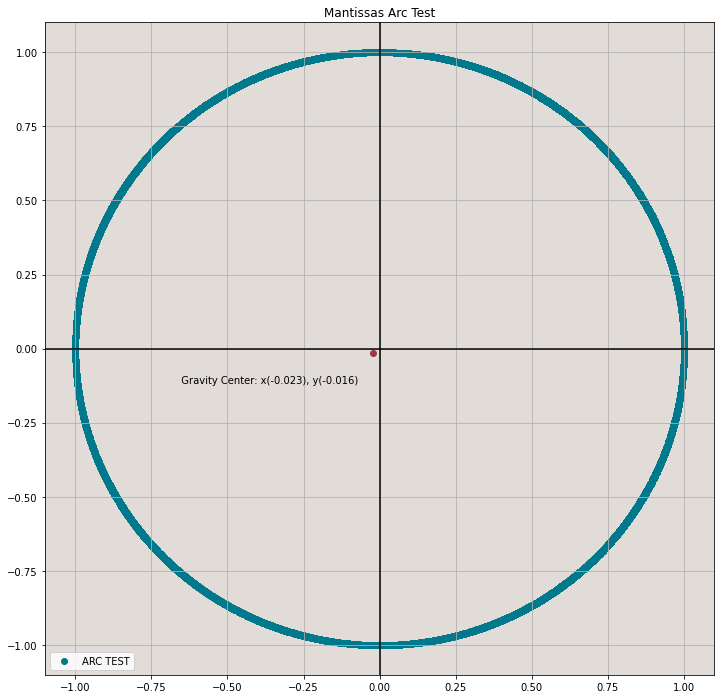

In [20]:
mantisa = bf.mantissas(bankfull.balance)

### Objetivo de Control - Generación del Indice de Flujo de Fondos de los clientes


La metodología utilizada para crear un Índice de Flujo de Fondos de los clientes consiste en asignar ponderaciones predeterminadas en función del activo o pasivo del cliente del Banco.

Por ejemplo, un deposito bancario más alto o la propiedad de una vivienda tendrá una influencia positiva en el índice de activos y, por lo tanto, se le asignará un peso más alto. En cambio, la presencia de un préstamo será un pasivo y, por tanto, tendrá que tener un peso menor. Se le otorga un peso de 3 si el cliente tiene una casa y 1 en su ausencia. Del mismo modo, podemos dar una ponderación de 1 si el cliente tiene un préstamo y de 3 en caso de que no haya préstamos.

In [21]:
filter_mask = bankfull["loan"] == "yes"
bankfullSub0 = bankfull[filter_mask].groupby("age")["y"].agg(total="count").reset_index()
bankfullSub0.head()

,age,total
0,20,3
1,21,8
2,22,12
3,23,19
4,24,38


In [62]:
fig = px.scatter(bankfullSub0, 
                 x="age", 
                 y="total", 
                 title="Clientes con prestamos por edad")
fig.show()

In [68]:
bankfullSub1 = bankfull[filter_mask].groupby(["L26951","contact"])["y"].agg(total="count").reset_index()
bankfullSub1.head()

,L26951,contact,total
0,0,cellular,2463
1,0,telephone,223
2,0,unknown,1000
3,1,cellular,2337
4,1,telephone,189


In [69]:
bankfullSub1 = bankfullSub1.query("L26951 == '1'").reset_index(drop=True)
bankfullSub1

,L26951,contact,total
0,1,cellular,2337
1,1,telephone,189
2,1,unknown,1032


In [65]:
bankfullSub1.L26951 = bankfullSub1.L26951.apply(str)

In [67]:
fig = px.scatter(bankfullSub1, 
                 x="age", 
                 y="total", 
                 color="L26951",
                 title="Clientes con prestamos por edad en registro Ley Nº 26.951")
fig.show()

#### Indice de Flujo de Fondos de los clientes


In [23]:
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,L26951
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [24]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  L26951     45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


Transformación de los depositos (balance)

In [25]:
from sklearn import preprocessing

In [26]:
x = bankfull[["balance"]].values.astype(float)

In [27]:
transf = preprocessing.MinMaxScaler()

In [28]:
bankfull["balancetransf"] = transf.fit_transform(x)

In [29]:
bankfull.balancetransf = bankfull.balancetransf.apply(lambda x: round(x,3))

In [30]:
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,L26951,balancetransf
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0.092
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0.073
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0.073
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0.086
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0.073


In [31]:
bankfull.loc[bankfull["loan"] =="yes", "loantransf"] = 1
bankfull.loc[bankfull["loan"] =="no", "loantransf"] = 3
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,L26951,balancetransf,loantransf
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0.092,3.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0.073,3.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0.073,1.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0.086,3.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0.073,3.0


In [32]:
bankfull.loc[bankfull["housing"] == "yes", "housingtransf"] = 3
bankfull.loc[bankfull["housing"] == "no", "housingtransf"] = 1
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,L26951,balancetransf,loantransf,housingtransf
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0.092,3.0,3.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0.073,3.0,3.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0.073,1.0,3.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0.086,3.0,3.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0.073,3.0,1.0


In [33]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  int64  
 1   job            45211 non-null  object 
 2   marital        45211 non-null  object 
 3   education      45211 non-null  object 
 4   default        45211 non-null  object 
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  object 
 7   loan           45211 non-null  object 
 8   contact        45211 non-null  object 
 9   day            45211 non-null  int64  
 10  month          45211 non-null  object 
 11  duration       45211 non-null  int64  
 12  campaign       45211 non-null  int64  
 13  pdays          45211 non-null  int64  
 14  previous       45211 non-null  int64  
 15  poutcome       45211 non-null  object 
 16  y              45211 non-null  object 
 17  L26951         45211 non-null  int64  
 18  balanc

In [34]:
bankfull["ind"] = bankfull.balancetransf + bankfull.loantransf + bankfull.housingtransf

In [35]:
ind025 = round(bankfull["ind"].quantile(q=0.25),3)
ind025

4.075

In [36]:
ind050 = round(bankfull["ind"].quantile(q=0.50),3)
ind050

4.114

In [37]:
ind075 = round(bankfull["ind"].quantile(q=0.75),3)
ind075

6.076

#### Creación de Cuantiles basados ​​en Indice de Activos

In [38]:
bankfull["qInd"] = "1q"
bankfull.loc[(bankfull["ind"] > ind025) & (bankfull["ind"] < ind050), "qInd"] = "2q"
bankfull.loc[(bankfull["ind"] > ind050) & (bankfull["ind"] < ind075), "qInd"] = "3q"
bankfull.loc[bankfull["ind"] > ind075, "qInd"] = "4q"
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,L26951,balancetransf,loantransf,housingtransf,ind,qInd
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0.092,3.0,3.0,6.092,4q
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0.073,3.0,3.0,6.073,3q
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0.073,1.0,3.0,4.073,1q
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0.086,3.0,3.0,6.086,4q
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0.073,3.0,1.0,4.073,1q


#### Total de los Clientes Bancarios por Cuartil Indice - CBCI

In [39]:
CBCI = bankfull.groupby(["qInd","loan"])["loan"].agg(TCBCI='count').reset_index()
CBCI

,qInd,loan,TCBCI
0,1q,no,6471
1,1q,yes,5130
2,2q,no,9093
3,2q,yes,1950
4,3q,no,10254
5,3q,yes,164
6,4q,no,12149


In [40]:
CBCI = CBCI.query("loan == 'yes'").reset_index(drop=True)
CBCI

,qInd,loan,TCBCI
0,1q,yes,5130
1,2q,yes,1950
2,3q,yes,164


In [41]:
CBCI["TCBCI%"] = round((CBCI.TCBCI / CBCI.TCBCI.sum())*100,3)
CBCI

,qInd,loan,TCBCI,TCBCI%
0,1q,yes,5130,70.817
1,2q,yes,1950,26.919
2,3q,yes,164,2.264


#### Total de los Clientes Bancarios por Cuartil Indice Desagregado - CBCID

In [42]:
CBCID = bankfull.groupby(["qInd","age","loan"])["age"].agg(TCBCID='count').reset_index()
CBCID

,qInd,age,loan,TCBCID
0,1q,18,no,7
1,1q,19,no,18
2,1q,20,no,20
3,1q,20,yes,3
4,1q,21,no,20
...,...,...,...,...
393,4q,74,no,1
394,4q,75,no,2
395,4q,76,no,1
396,4q,77,no,2


In [43]:
CBCID = CBCID.query("loan == 'yes'").reset_index(drop=True)
CBCID

,qInd,age,loan,TCBCID
0,1q,20,yes,3
1,1q,21,yes,8
2,1q,22,yes,9
3,1q,23,yes,13
4,1q,24,yes,25
...,...,...,...,...
118,3q,56,yes,3
119,3q,57,yes,4
120,3q,58,yes,1
121,3q,59,yes,1


In [44]:
CBCID["TCBCID%"] = round((CBCID.TCBCID / CBCID.TCBCID.sum())*100,3)
CBCID

,qInd,age,loan,TCBCID,TCBCID%
0,1q,20,yes,3,0.041
1,1q,21,yes,8,0.110
2,1q,22,yes,9,0.124
3,1q,23,yes,13,0.179
4,1q,24,yes,25,0.345
...,...,...,...,...,...
118,3q,56,yes,3,0.041
119,3q,57,yes,4,0.055
120,3q,58,yes,1,0.014
121,3q,59,yes,1,0.014


#### Fusionando los DataFrame

In [45]:
ClientesIndice = pd.merge(CBCID, CBCI, on = ["qInd"])
ClientesIndice = ClientesIndice.drop(["loan_x","TCBCID%","loan_y","TCBCI%"], axis=1)
ClientesIndice

,qInd,age,TCBCID,TCBCI
0,1q,20,3,5130
1,1q,21,8,5130
2,1q,22,9,5130
3,1q,23,13,5130
4,1q,24,25,5130
...,...,...,...,...
118,3q,56,3,164
119,3q,57,4,164
120,3q,58,1,164
121,3q,59,1,164


In [46]:
ClientesIndice["Indice"] = round((ClientesIndice.TCBCID/ClientesIndice.TCBCI)*100,3)
ClientesIndice

,qInd,age,TCBCID,TCBCI,Indice
0,1q,20,3,5130,0.058
1,1q,21,8,5130,0.156
2,1q,22,9,5130,0.175
3,1q,23,13,5130,0.253
4,1q,24,25,5130,0.487
...,...,...,...,...,...
118,3q,56,3,164,1.829
119,3q,57,4,164,2.439
120,3q,58,1,164,0.610
121,3q,59,1,164,0.610


In [47]:
ClientesIndice.max()

qInd         3q
age          72
TCBCID      228
TCBCI      5130
Indice    9.756
dtype: object

In [55]:
ClientesIndice.min()

qInd         1q
age          20
TCBCID        1
TCBCI       164
Indice    0.019
dtype: object

In [54]:
ClientesIndice.query("Indice == '9.756'")

,qInd,age,TCBCID,TCBCI,Indice
95,3q,32,16,164,9.756


In [56]:
ClientesIndice.query("Indice == '0.019'")

,qInd,age,TCBCID,TCBCI,Indice
43,1q,64,1,5130,0.019
44,1q,65,1,5130,0.019
45,1q,66,1,5130,0.019
46,1q,71,1,5130,0.019


In [59]:
fig = px.scatter(ClientesIndice, 
                 x="age", 
                 y="Indice", 
                 color="qInd",
                 title="Prestamos por Cuartil por edad")
fig.show()